In [1]:
import pandas as pd
import glob
from autogluon.tabular import TabularPredictor
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configuration
total_time_seconds = 1 * 10 * 60
num_experiments = 1
calculate_features = False  # Set to False for faster prototyping, True for final runs
time_limit_seconds = total_time_seconds / num_experiments
autogluon_preset = "medium"
model_save_path = "saved_models/10min_7b_7c"  # Base directory for saving models

# Get list of all datasets
dataset_dirs = ["04_datasets/qos_7b"]
test_dataset_dir = "04_datasets/qos_7c"
dataset_types = ["CPU.feather",
                 "Disk_io.feather",
                 "Kepler.feather",
                 "Memory.feather",
                 "Network.feather",
                 "Other.feather"
                 ]


In [2]:
# Create visualization of results
# 1. Performance comparison (now with both train and test performance)
def plot_results(results_dict):
    summary_df = pd.DataFrame([
        {
            "Train-Test Pair": f"{res['train_dataset']}-{res['test_dataset']}",
            "Training Performance": res["train_performance"],
            "Testing R²": res.get("test_r2", None),
            "Testing MSE": res.get("test_mse", None)
        }
        for dataset, res in results_dict.items()
        if "train_performance" in res and "error" not in res
    ])

    # Plot training performance
    plt.figure(figsize=(12, 6))
    sns.barplot(data=summary_df, x="Train-Test Pair", y="Training Performance", palette="Blues_d")
    plt.title("Training Performance Across Dataset Combinations")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Plot testing performance (R²)
    plt.figure(figsize=(12, 6))
    sns.barplot(data=summary_df, x="Train-Test Pair", y="Testing R²", palette="Greens_d")
    plt.title("Testing R² Across Dataset Combinations")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Plot testing performance (MSE)
    plt.figure(figsize=(12, 6))
    sns.barplot(data=summary_df, x="Train-Test Pair", y="Testing MSE", palette="Reds_d")
    plt.title("Testing MSE Across Dataset Combinations (Lower is Better)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # 2. Feature importance plots
    valid_results = [(dataset, res) for dataset, res in results.items() if "top_features" in res]
    num_datasets = len(valid_results)

    if num_datasets > 0:
        fig, axes = plt.subplots(num_datasets, 1, figsize=(12, 5 * num_datasets))

        # Handle case with only one result
        if num_datasets == 1:
            axes = [axes]

        for i, (dataset, res) in enumerate(valid_results):
            axes[i].bar(res["top_features"], res["feature_importance"])
            axes[i].set_title(f"Top Features: {res['train_dataset']} → {res['test_dataset']}")
            axes[i].set_xlabel("Feature")
            axes[i].set_ylabel("Importance")
            axes[i].tick_params(axis='x', rotation=45)
            print(f"Top features for {res['train_dataset']} → {res['test_dataset']}: {res['top_features']}")

        plt.tight_layout()
        plt.show()
    else:
        print("No valid feature importance data found in results.")

    # 3. Add a correlation heatmap for training vs testing metrics
    if len(summary_df) > 1:
        plt.figure(figsize=(10, 8))
        corr_metrics = summary_df[["Training Performance", "Testing R²", "Testing MSE"]].corr()
        sns.heatmap(corr_metrics, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
        plt.title("Correlation Between Training and Testing Metrics")
        plt.tight_layout()
        plt.show()

    # 4. Display errors if any
    errors = [(dataset, res["error"]) for dataset, res in results.items() if "error" in res]
    if errors:
        print("\nErrors encountered:")
        for dataset, error in errors:
            print(f"{os.path.basename(dataset)}: {error}")


Preset alias specified: 'medium' maps to 'medium_quality'.
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.16
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          32
Memory Avail:       38.75 GB / 63.77 GB (60.8%)
Disk Space Avail:   145.46 GB / 1906.83 GB (7.6%)
Presets specified: ['medium']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "C:\Users\Anton\Documents\projektit\06_framework\framework-predict\experiments\qos\saved_models\10min_7b_7c\CPU.feather"
Train Data Rows:    82843
Train Data Columns: 54
Label Column:       target
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    39682.12 MB
	Train Data (Original)  Memory Usage: 34.13 MB (0.1% of available memory)
	Inferring data typ

Train dataset has 55 columns
Test dataset has 55 columns
Using 55 common columns for training and testing
Training on CPU.feather, will test on CPU.feather
Training model on CPU.feather...
Training new model for CPU.feather...


		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
		Fitting DatetimeFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerator...
	Types of features in original data (raw dtype, special dtypes):
		('datetime', []) :  1 | ['timestamp']
		('float', [])    : 49 | ['{"__name__": "node_cpu_seconds_rate", "cpu": "1", "instance": "worker", "mode": "system"}', '{"__name__": "node_cpu_seconds_rate", "cpu": "2", "instance": "worker", "mode": "idle"}', '{"__name__": "instance:node_cpu:ratio", "instance": "worker"}', '{"__name__": "node_schedstat_waiting_seconds_rate", "cpu": "2", "instance": "worker"}', '{"__name__": "node_cpu_seconds_rate", "cpu": "3", "instance": "worker", "mode": "system"}', ...]
		('int', [])      :  4 | ['{"__name__": "node_cpu_scaling_frequency_hertz", "cpu": "1", "instance": "worker"}', '{"__name__": "node_cpu_scaling_frequency_hertz", "cpu": "3"

[1000]	valid_set's rmse: 0.595236
[2000]	valid_set's rmse: 0.547681
[3000]	valid_set's rmse: 0.516865
[4000]	valid_set's rmse: 0.492585
[5000]	valid_set's rmse: 0.474231
[6000]	valid_set's rmse: 0.458343
[7000]	valid_set's rmse: 0.443928
[8000]	valid_set's rmse: 0.432786
[9000]	valid_set's rmse: 0.421499
[10000]	valid_set's rmse: 0.410852


	-0.4109	 = Validation score   (-root_mean_squared_error)
	18.6s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: LightGBM ... Training model for up to 578.15s of the 578.15s of remaining time.


[1000]	valid_set's rmse: 0.443591
[2000]	valid_set's rmse: 0.370918
[3000]	valid_set's rmse: 0.327524
[4000]	valid_set's rmse: 0.297389
[5000]	valid_set's rmse: 0.275042
[6000]	valid_set's rmse: 0.258558
[7000]	valid_set's rmse: 0.245863
[8000]	valid_set's rmse: 0.236505
[9000]	valid_set's rmse: 0.227897
[10000]	valid_set's rmse: 0.220896


	-0.2209	 = Validation score   (-root_mean_squared_error)
	17.3s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: RandomForestMSE ... Training model for up to 559.96s of the 559.96s of remaining time.
	-0.1997	 = Validation score   (-root_mean_squared_error)
	26.82s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: CatBoost ... Training model for up to 532.73s of the 532.73s of remaining time.
	-0.3536	 = Validation score   (-root_mean_squared_error)
	98.08s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: ExtraTreesMSE ... Training model for up to 434.62s of the 434.62s of remaining time.
	-0.2329	 = Validation score   (-root_mean_squared_error)
	6.73s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: NeuralNetFastAI ... Training model for up to 427.49s of the 427.48s of remaining time.
	-0.6251	 = Validation score   (-root_mean_squared_error)
	61.26s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: XGB

Skipping feature importance calculation...
Testing model on CPU.feather...
*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2  -0.176679  root_mean_squared_error       0.180709   56.918408                0.000000           0.008915            2       True         11
1               XGBoost  -0.187276  root_mean_squared_error       0.118971   30.090576                0.118971          30.090576            1       True          9
2       RandomForestMSE  -0.199701  root_mean_squared_error       0.061738   26.818916                0.061738          26.818916            1       True          5
3              LightGBM  -0.220896  root_mean_squared_error       0.067176   17.302956                0.067176          17.302956            1       True          4
4         ExtraTreesMSE  -0.232934  ro

C:\Users\Anton\AppData\Local\Temp\ipykernel_19820\326902382.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_df, x="Train-Test Pair", y="Training Performance", palette="Blues_d")


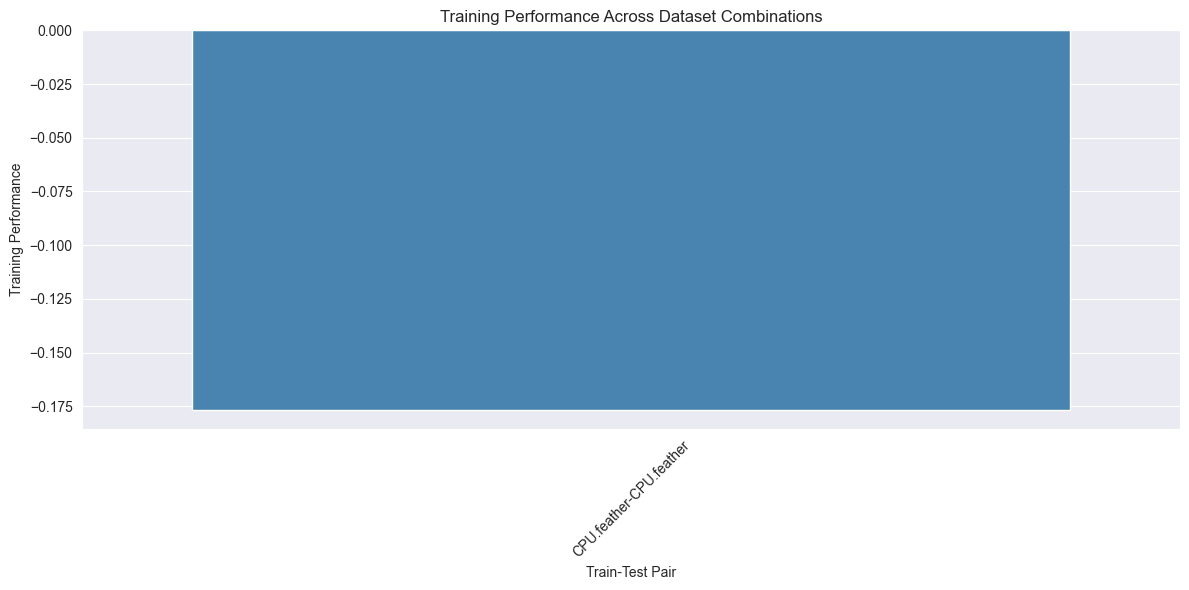

C:\Users\Anton\AppData\Local\Temp\ipykernel_19820\326902382.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_df, x="Train-Test Pair", y="Testing R²", palette="Greens_d")


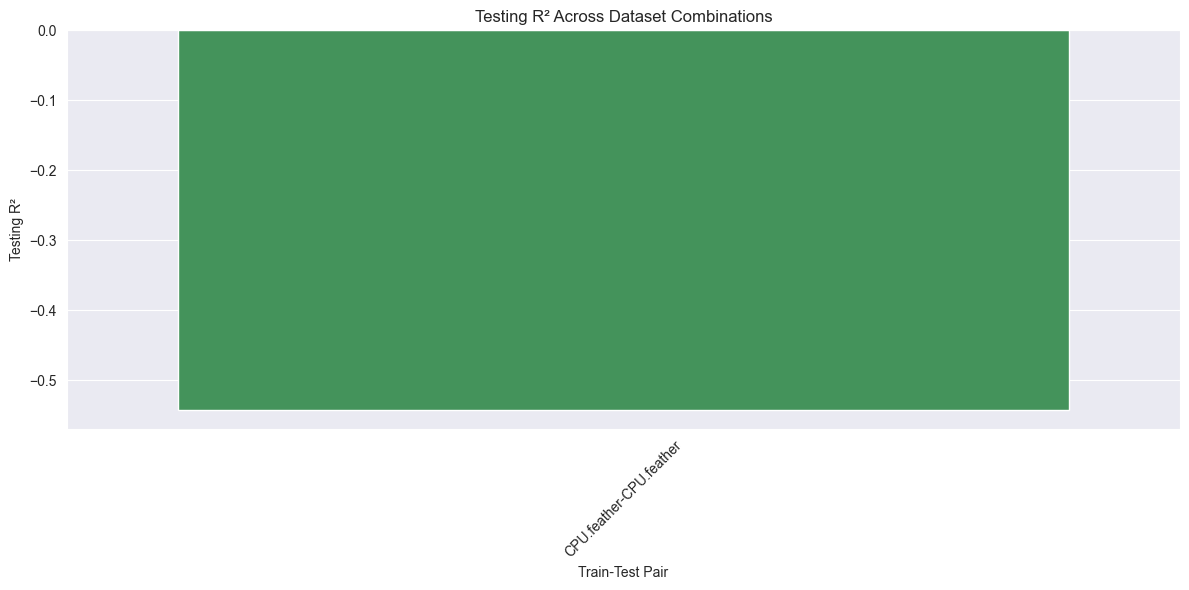

C:\Users\Anton\AppData\Local\Temp\ipykernel_19820\326902382.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_df, x="Train-Test Pair", y="Testing MSE", palette="Reds_d")


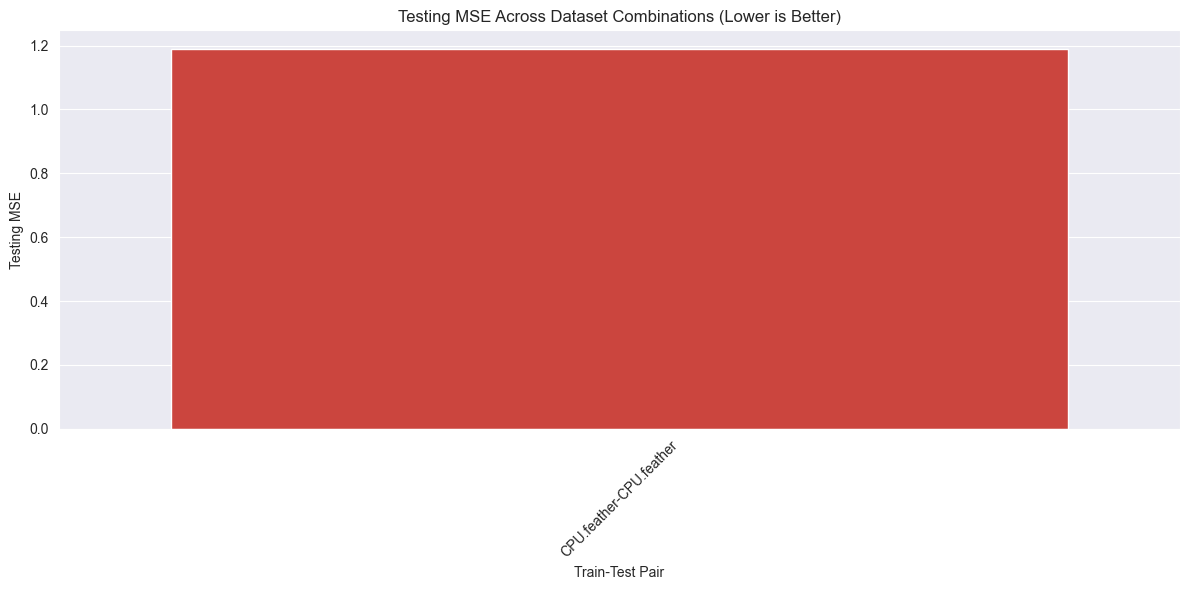

Preset alias specified: 'medium' maps to 'medium_quality'.
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.16
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          32
Memory Avail:       36.32 GB / 63.77 GB (57.0%)
Disk Space Avail:   152.43 GB / 1906.83 GB (8.0%)
Presets specified: ['medium']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "C:\Users\Anton\Documents\projektit\06_framework\framework-predict\experiments\qos\saved_models\10min_7b_7c\Disk_io.feather"
Train Data Rows:    82843
Train Data Columns: 14
Label Column:       target
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    37193.65 MB
	Train Data (Original)  Memory Usage: 8.85 MB (0.0% of available memory)
	Inferring data 

No valid feature importance data found in results.
Train dataset has 15 columns
Test dataset has 16 columns
Using 15 common columns for training and testing
Training on Disk_io.feather, will test on Disk_io.feather
Training model on Disk_io.feather...
Training new model for Disk_io.feather...


User-specified model hyperparameters to be fit:
{
	'NN_TORCH': [{}],
	'GBM': [{'extra_trees': True, 'ag_args': {'name_suffix': 'XT'}}, {}, {'learning_rate': 0.03, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 3, 'ag_args': {'name_suffix': 'Large', 'priority': 0, 'hyperparameter_tune_kwargs': None}}],
	'CAT': [{}],
	'XGB': [{}],
	'FASTAI': [{}],
	'RF': [{'criterion': 'gini', 'ag_args': {'name_suffix': 'Gini', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'entropy', 'ag_args': {'name_suffix': 'Entr', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression', 'quantile']}}],
	'XT': [{'criterion': 'gini', 'ag_args': {'name_suffix': 'Gini', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'entropy', 'ag_args': {'name_suffix': 'Entr', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regressi

[1000]	valid_set's rmse: 0.610462
[2000]	valid_set's rmse: 0.579761
[3000]	valid_set's rmse: 0.564249
[4000]	valid_set's rmse: 0.553901
[5000]	valid_set's rmse: 0.545673
[6000]	valid_set's rmse: 0.539147
[7000]	valid_set's rmse: 0.53325
[8000]	valid_set's rmse: 0.527779
[9000]	valid_set's rmse: 0.523188
[10000]	valid_set's rmse: 0.518849


	-0.5188	 = Validation score   (-root_mean_squared_error)
	11.76s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: LightGBM ... Training model for up to 586.97s of the 586.97s of remaining time.


[1000]	valid_set's rmse: 0.410707
[2000]	valid_set's rmse: 0.359132
[3000]	valid_set's rmse: 0.33123
[4000]	valid_set's rmse: 0.310469
[5000]	valid_set's rmse: 0.295355
[6000]	valid_set's rmse: 0.286239
[7000]	valid_set's rmse: 0.276338
[8000]	valid_set's rmse: 0.269587
[9000]	valid_set's rmse: 0.26246
[10000]	valid_set's rmse: 0.256945


	-0.2569	 = Validation score   (-root_mean_squared_error)
	8.2s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: RandomForestMSE ... Training model for up to 577.90s of the 577.90s of remaining time.
	-0.2019	 = Validation score   (-root_mean_squared_error)
	4.77s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: CatBoost ... Training model for up to 572.71s of the 572.71s of remaining time.
	-0.3782	 = Validation score   (-root_mean_squared_error)
	91.68s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: ExtraTreesMSE ... Training model for up to 480.97s of the 480.97s of remaining time.
	-0.2218	 = Validation score   (-root_mean_squared_error)
	1.63s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: NeuralNetFastAI ... Training model for up to 478.95s of the 478.95s of remaining time.
	-0.6181	 = Validation score   (-root_mean_squared_error)
	60.26s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: XGBoo

Skipping feature importance calculation...
Testing model on Disk_io.feather...
*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2  -0.199416  root_mean_squared_error       0.169913   27.148520                0.000000           0.010200            2       True         11
1       RandomForestMSE  -0.201924  root_mean_squared_error       0.060793    4.770874                0.060793           4.770874            1       True          5
2         ExtraTreesMSE  -0.221798  root_mean_squared_error       0.064200    1.630671                0.064200           1.630671            1       True          7
3               XGBoost  -0.222235  root_mean_squared_error       0.109120   22.367446                0.109120          22.367446            1       True          9
4              LightGBM  -0.256943

C:\Users\Anton\AppData\Local\Temp\ipykernel_19820\326902382.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_df, x="Train-Test Pair", y="Training Performance", palette="Blues_d")


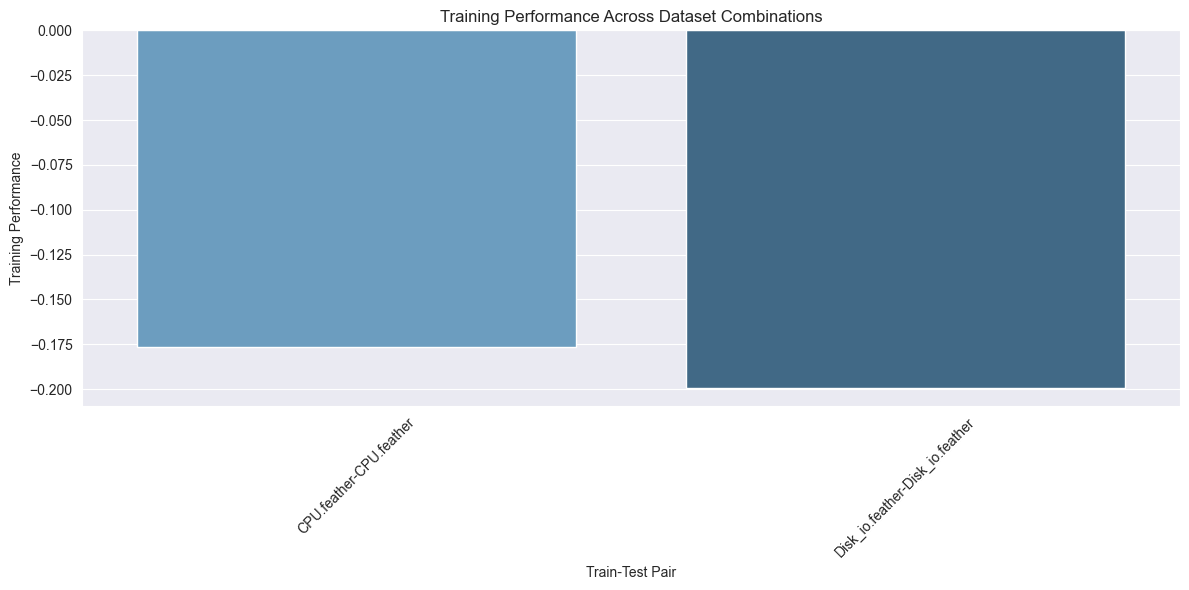

C:\Users\Anton\AppData\Local\Temp\ipykernel_19820\326902382.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_df, x="Train-Test Pair", y="Testing R²", palette="Greens_d")


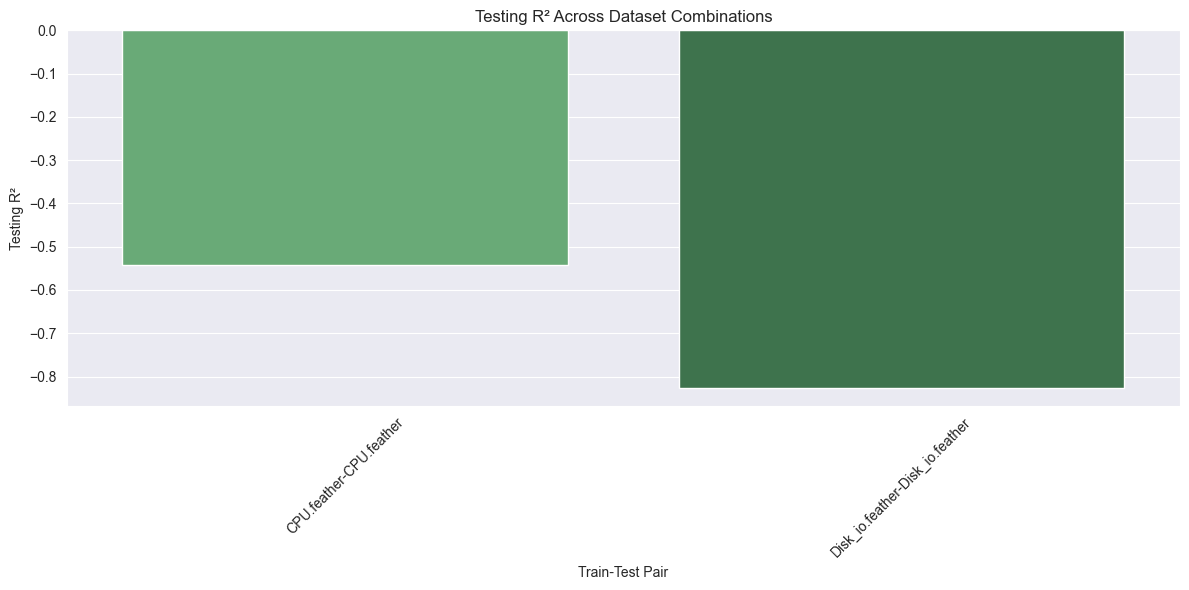

C:\Users\Anton\AppData\Local\Temp\ipykernel_19820\326902382.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_df, x="Train-Test Pair", y="Testing MSE", palette="Reds_d")


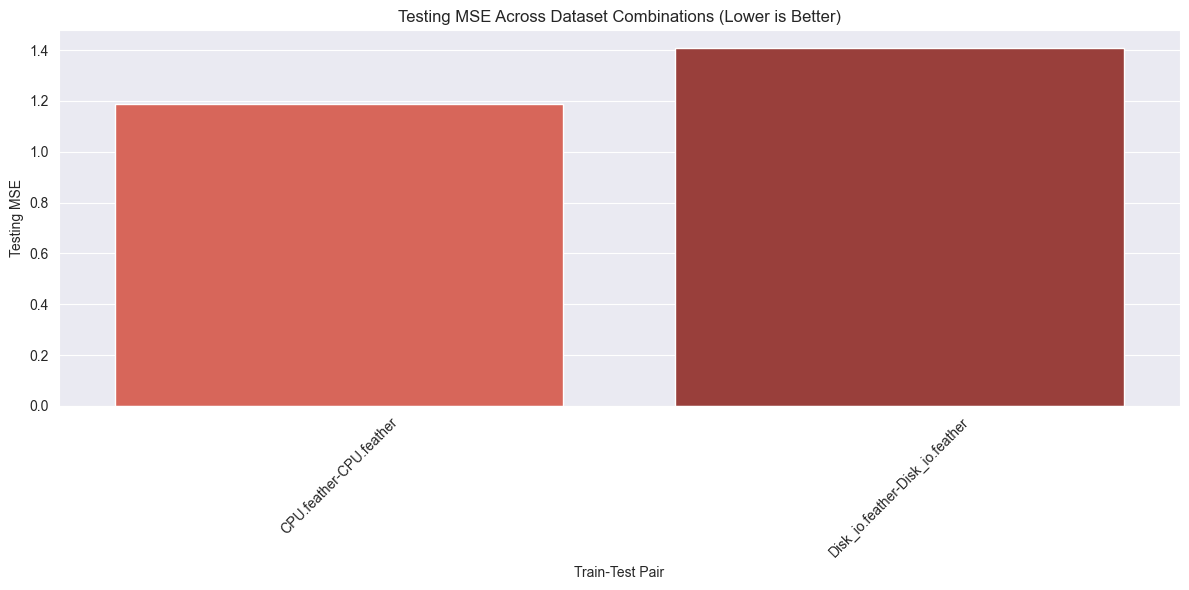

No valid feature importance data found in results.


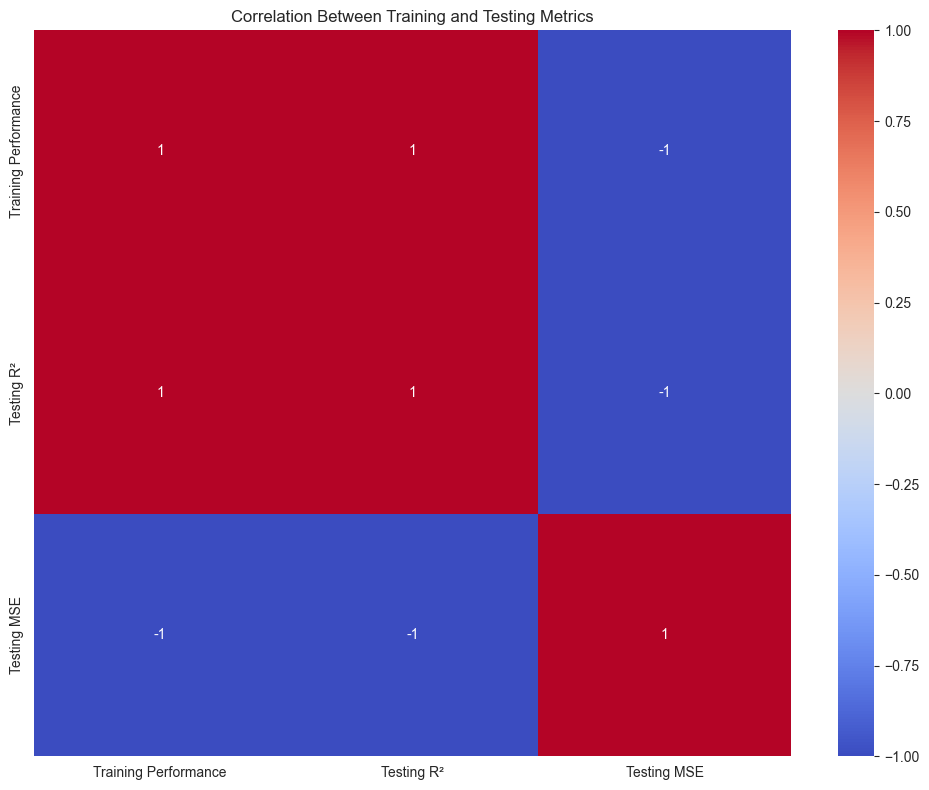

Preset alias specified: 'medium' maps to 'medium_quality'.
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.16
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          32
Memory Avail:       34.94 GB / 63.77 GB (54.8%)
Disk Space Avail:   151.12 GB / 1906.83 GB (7.9%)
Presets specified: ['medium']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "C:\Users\Anton\Documents\projektit\06_framework\framework-predict\experiments\qos\saved_models\10min_7b_7c\Kepler.feather"
Train Data Rows:    82855
Train Data Columns: 1
Label Column:       target
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    35773.98 MB
	Train Data (Original)  Memory Usage: 0.63 MB (0.0% of available memory)
	Inferring data ty

Train dataset has 2 columns
Test dataset has 2 columns
Using 2 common columns for training and testing
Training on Kepler.feather, will test on Kepler.feather
Training model on Kepler.feather...
Training new model for Kepler.feather...


AutoGluon will gauge predictive performance using evaluation metric: 'root_mean_squared_error'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.
	To change this, specify the eval_metric parameter of Predictor()
Automatically generating train/validation split with holdout_frac=0.03017319413433106, Train Rows: 80355, Val Rows: 2500
User-specified model hyperparameters to be fit:
{
	'NN_TORCH': [{}],
	'GBM': [{'extra_trees': True, 'ag_args': {'name_suffix': 'XT'}}, {}, {'learning_rate': 0.03, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 3, 'ag_args': {'name_suffix': 'Large', 'priority': 0, 'hyperparameter_tune_kwargs': None}}],
	'CAT': [{}],
	'XGB': [{}],
	'FASTAI': [{}],
	'RF': [{'criterion': 'gini', 'ag_args': {'name_suffix': 'Gini', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'entropy', 'ag_args': {'name_suffix': 'Entr', 'problem_types': ['binary', 'multiclass']}}

[1000]	valid_set's rmse: 0.755237
[2000]	valid_set's rmse: 0.751687
[3000]	valid_set's rmse: 0.750786
[4000]	valid_set's rmse: 0.75028
[5000]	valid_set's rmse: 0.749768
[6000]	valid_set's rmse: 0.749426
[7000]	valid_set's rmse: 0.749207
[8000]	valid_set's rmse: 0.74896
[9000]	valid_set's rmse: 0.748785
[10000]	valid_set's rmse: 0.748612


	-0.7486	 = Validation score   (-root_mean_squared_error)
	3.33s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: LightGBM ... Training model for up to 595.59s of the 595.59s of remaining time.
	-0.7469	 = Validation score   (-root_mean_squared_error)
	0.35s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: RandomForestMSE ... Training model for up to 595.22s of the 595.22s of remaining time.
	-0.7504	 = Validation score   (-root_mean_squared_error)
	0.77s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: CatBoost ... Training model for up to 594.36s of the 594.36s of remaining time.
	-0.7493	 = Validation score   (-root_mean_squared_error)
	2.33s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: ExtraTreesMSE ... Training model for up to 592.03s of the 592.03s of remaining time.
	-0.7504	 = Validation score   (-root_mean_squared_error)
	0.59s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: NeuralNetFastA

Skipping feature importance calculation...
Testing model on Kepler.feather...
*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2  -0.746100  root_mean_squared_error       0.104634  544.077847                0.000000           0.007249            2       True         11
1              LightGBM  -0.746899  root_mean_squared_error       0.008531    0.345088                0.008531           0.345088            1       True          4
2               XGBoost  -0.748294  root_mean_squared_error       0.003098    0.413759                0.003098           0.413759            1       True          9
3            LightGBMXT  -0.748612  root_mean_squared_error       0.060271    3.331557                0.060271           3.331557            1       True          3
4              CatBoost  -0.749327 

C:\Users\Anton\AppData\Local\Temp\ipykernel_19820\326902382.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_df, x="Train-Test Pair", y="Training Performance", palette="Blues_d")


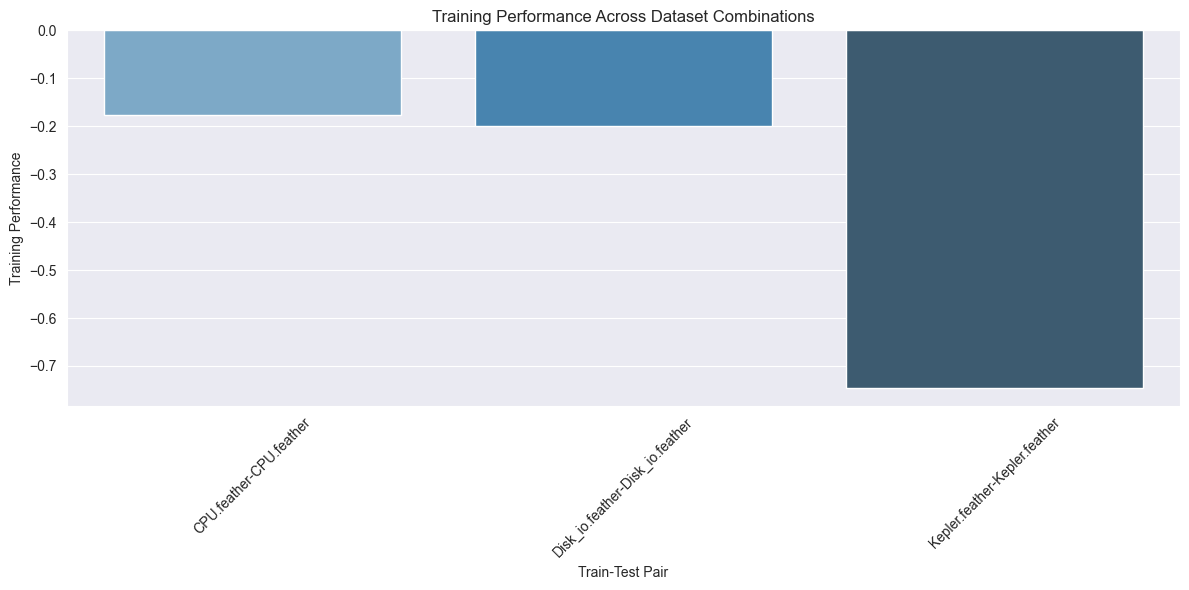

C:\Users\Anton\AppData\Local\Temp\ipykernel_19820\326902382.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_df, x="Train-Test Pair", y="Testing R²", palette="Greens_d")


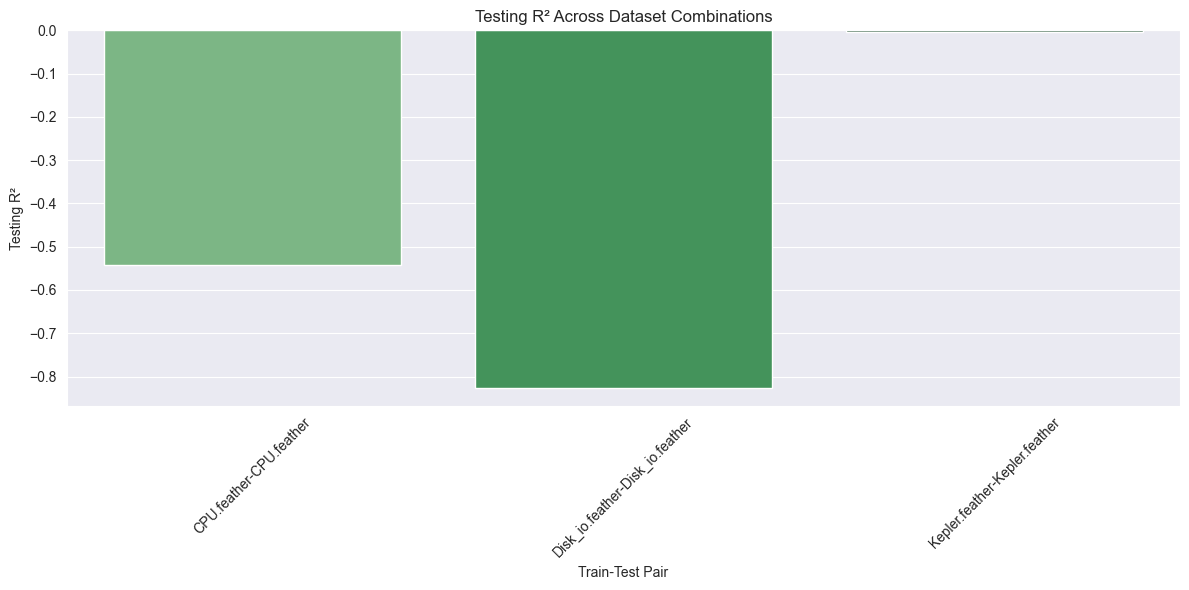

C:\Users\Anton\AppData\Local\Temp\ipykernel_19820\326902382.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_df, x="Train-Test Pair", y="Testing MSE", palette="Reds_d")


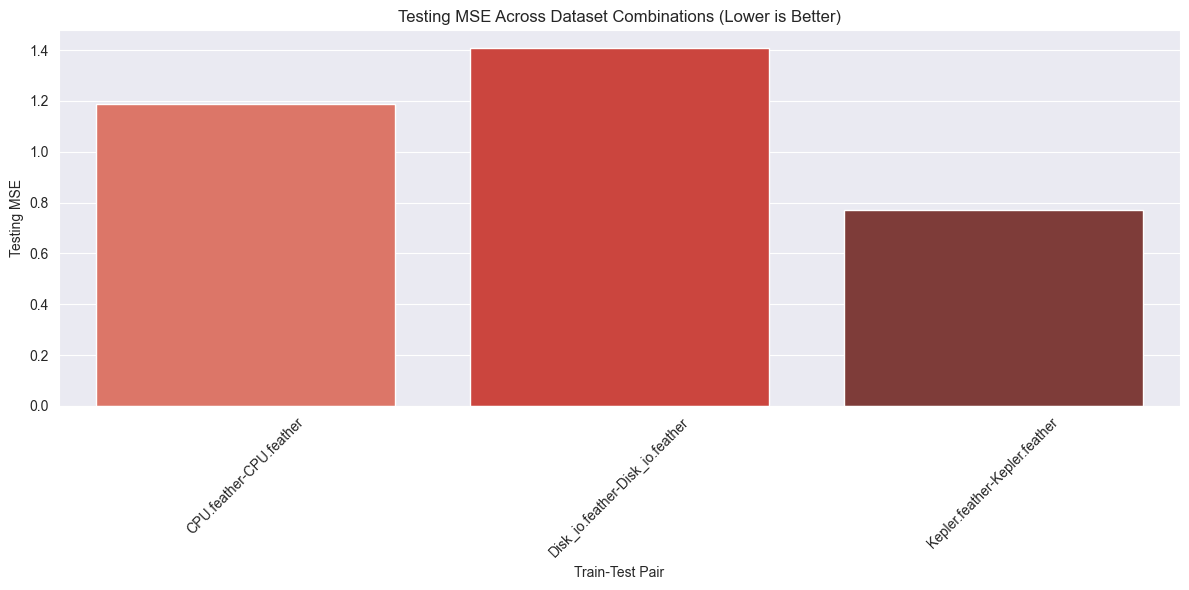

No valid feature importance data found in results.


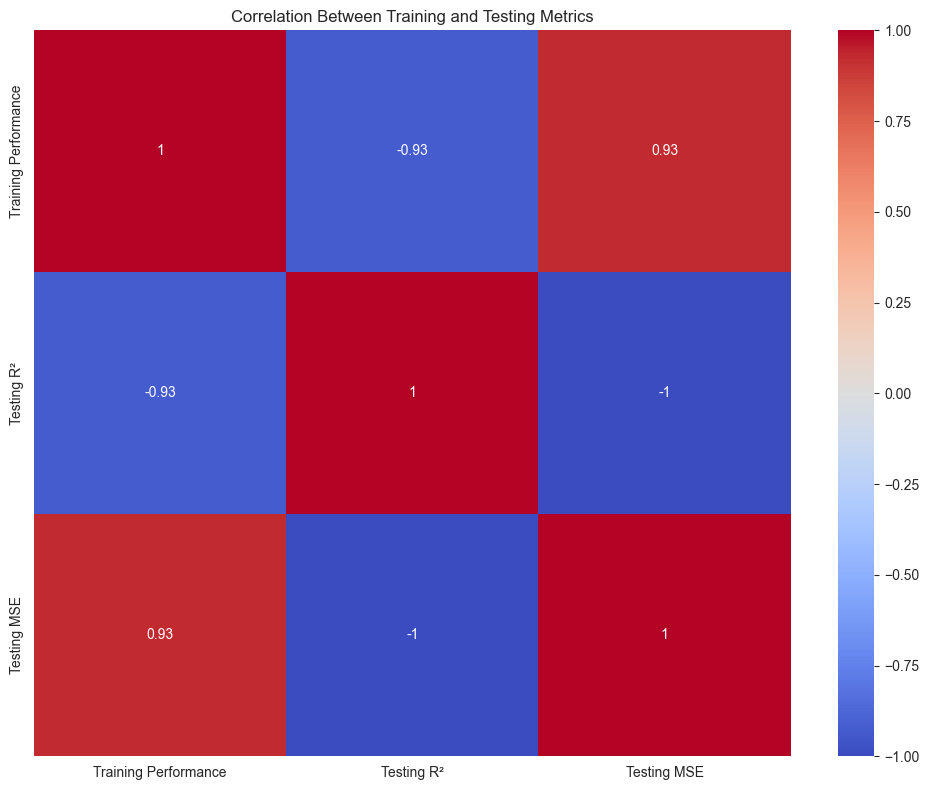

Preset alias specified: 'medium' maps to 'medium_quality'.
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.16
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          32
Memory Avail:       34.88 GB / 63.77 GB (54.7%)
Disk Space Avail:   149.75 GB / 1906.83 GB (7.9%)
Presets specified: ['medium']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "C:\Users\Anton\Documents\projektit\06_framework\framework-predict\experiments\qos\saved_models\10min_7b_7c\Memory.feather"
Train Data Rows:    82843
Train Data Columns: 10
Label Column:       target
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    35713.66 MB
	Train Data (Original)  Memory Usage: 6.32 MB (0.0% of available memory)
	Inferring data t

Train dataset has 11 columns
Test dataset has 11 columns
Using 11 common columns for training and testing
Training on Memory.feather, will test on Memory.feather
Training model on Memory.feather...
Training new model for Memory.feather...


		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
		Fitting DatetimeFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerator...
	Types of features in original data (raw dtype, special dtypes):
		('datetime', []) : 1 | ['timestamp']
		('float', [])    : 8 | ['{"__name__": "instance:node_vmstat_pgmajfault:rate5m", "instance": "worker"}', '{"__name__": "node_vmstat_pgpgout_rate", "instance": "worker"}', '{"__name__": "node_pressure_memory_stalled_seconds_rate", "instance": "worker"}', '{"__name__": "instance:node_memory_utilisation:ratio", "instance": "worker"}', '{"__name__": "node_vmstat_pgmajfault_rate", "instance": "worker"}', ...]
		('int', [])      : 1 | ['{"__name__": "process_resident_memory_bytes", "instance": "worker"}']
	Types of features in processed data (raw dtype, special dtypes):
		('float', [])                : 8 | ['{"__name__": "instance:nod

[1000]	valid_set's rmse: 0.502308
[2000]	valid_set's rmse: 0.457564
[3000]	valid_set's rmse: 0.435834
[4000]	valid_set's rmse: 0.421019
[5000]	valid_set's rmse: 0.410284
[6000]	valid_set's rmse: 0.401282
[7000]	valid_set's rmse: 0.394732
[8000]	valid_set's rmse: 0.38905
[9000]	valid_set's rmse: 0.384354
[10000]	valid_set's rmse: 0.380136


	-0.3801	 = Validation score   (-root_mean_squared_error)
	10.1s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: LightGBM ... Training model for up to 588.36s of the 588.36s of remaining time.


[1000]	valid_set's rmse: 0.318914
[2000]	valid_set's rmse: 0.283238
[3000]	valid_set's rmse: 0.266063
[4000]	valid_set's rmse: 0.255662
[5000]	valid_set's rmse: 0.246769
[6000]	valid_set's rmse: 0.24064
[7000]	valid_set's rmse: 0.236145
[8000]	valid_set's rmse: 0.232603
[9000]	valid_set's rmse: 0.23063
[10000]	valid_set's rmse: 0.2282


	-0.2282	 = Validation score   (-root_mean_squared_error)
	7.35s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: RandomForestMSE ... Training model for up to 580.11s of the 580.11s of remaining time.
	-0.1989	 = Validation score   (-root_mean_squared_error)
	3.13s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: CatBoost ... Training model for up to 576.61s of the 576.61s of remaining time.
	-0.2867	 = Validation score   (-root_mean_squared_error)
	70.97s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: ExtraTreesMSE ... Training model for up to 505.62s of the 505.62s of remaining time.
	-0.2041	 = Validation score   (-root_mean_squared_error)
	1.15s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: NeuralNetFastAI ... Training model for up to 504.11s of the 504.11s of remaining time.
	-0.5684	 = Validation score   (-root_mean_squared_error)
	46.02s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: XGBo

Skipping feature importance calculation...
Testing model on Memory.feather...
*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2  -0.195458  root_mean_squared_error       0.231788   29.510763                0.000000           0.008900            2       True         11
1       RandomForestMSE  -0.198856  root_mean_squared_error       0.047687    3.128010                0.047687           3.128010            1       True          5
2         ExtraTreesMSE  -0.204052  root_mean_squared_error       0.046302    1.146808                0.046302           1.146808            1       True          7
3               XGBoost  -0.214276  root_mean_squared_error       0.105824   19.027960                0.105824          19.027960            1       True          9
4              LightGBM  -0.228193 

C:\Users\Anton\AppData\Local\Temp\ipykernel_19820\326902382.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_df, x="Train-Test Pair", y="Training Performance", palette="Blues_d")


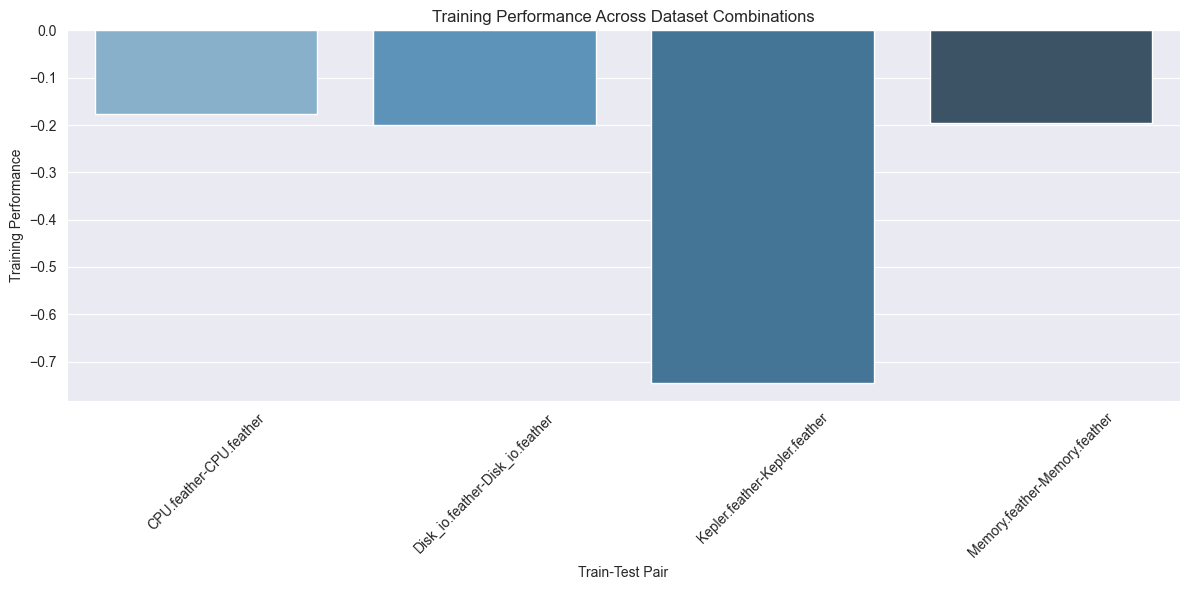

C:\Users\Anton\AppData\Local\Temp\ipykernel_19820\326902382.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_df, x="Train-Test Pair", y="Testing R²", palette="Greens_d")


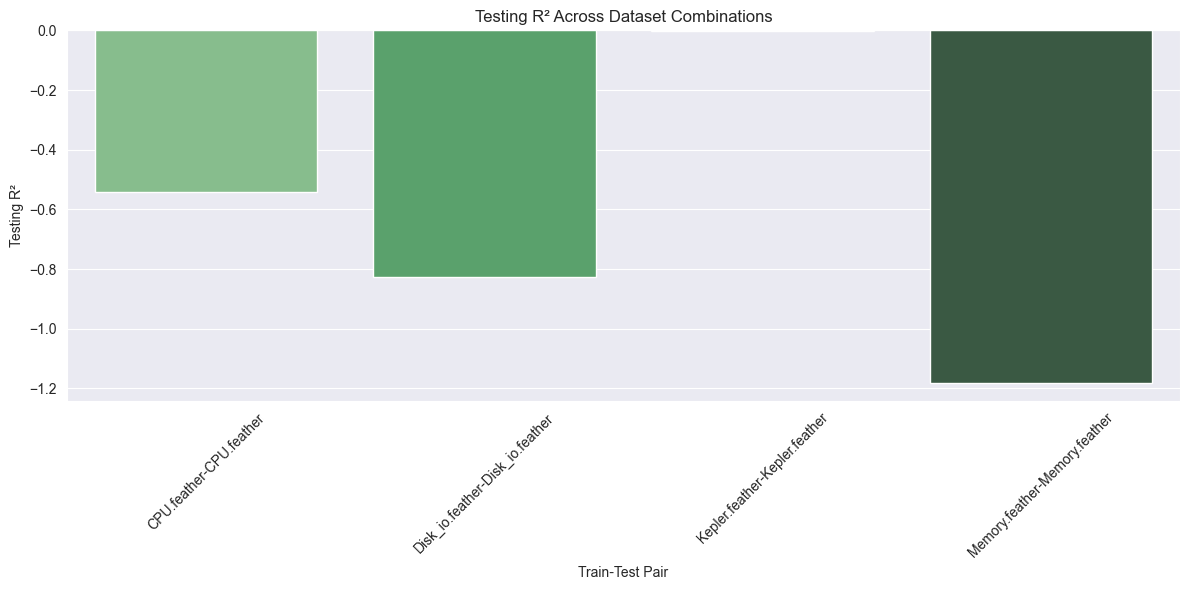

C:\Users\Anton\AppData\Local\Temp\ipykernel_19820\326902382.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_df, x="Train-Test Pair", y="Testing MSE", palette="Reds_d")


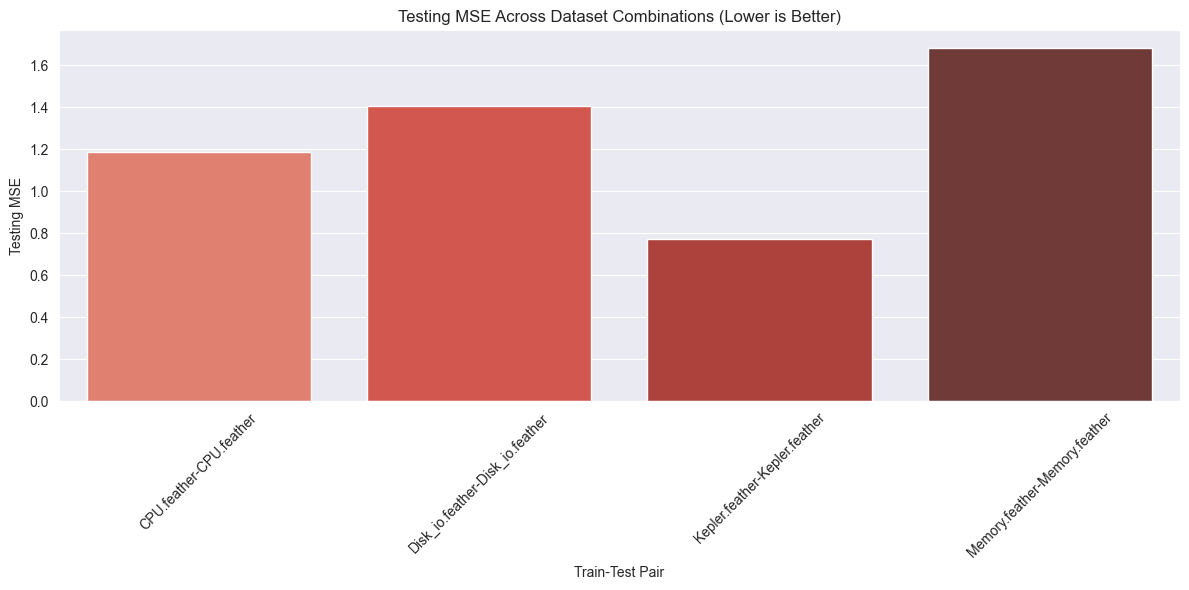

No valid feature importance data found in results.


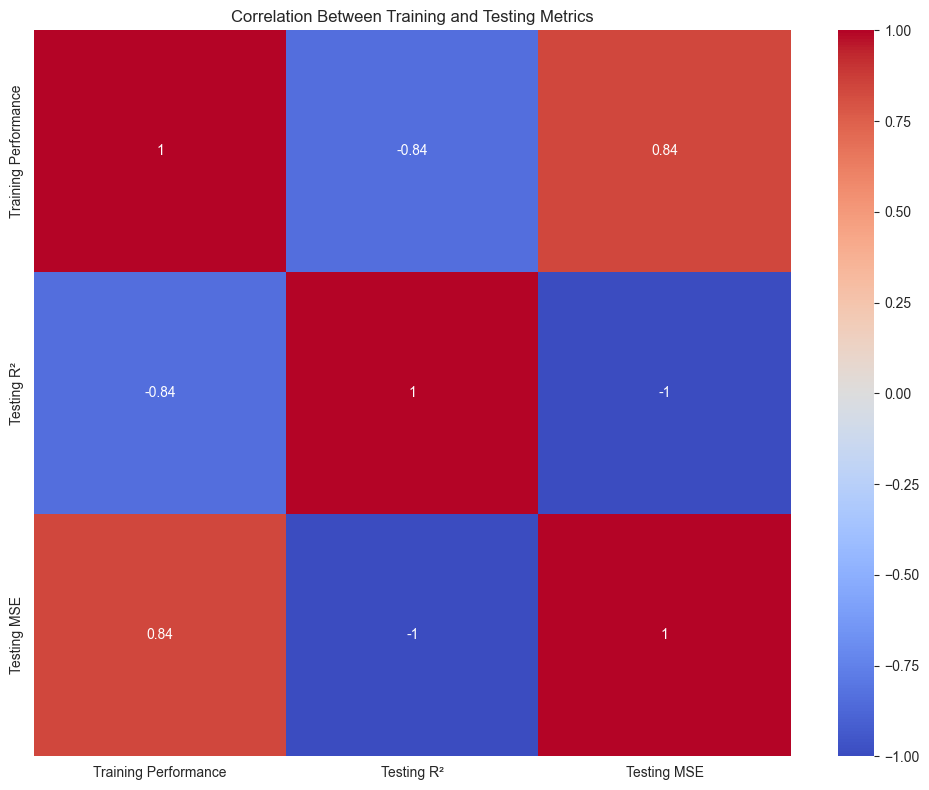

Preset alias specified: 'medium' maps to 'medium_quality'.
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.16
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          32
Memory Avail:       34.97 GB / 63.77 GB (54.8%)
Disk Space Avail:   148.39 GB / 1906.83 GB (7.8%)
Presets specified: ['medium']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "C:\Users\Anton\Documents\projektit\06_framework\framework-predict\experiments\qos\saved_models\10min_7b_7c\Network.feather"
Train Data Rows:    82843
Train Data Columns: 26
Label Column:       target
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    35809.94 MB
	Train Data (Original)  Memory Usage: 16.43 MB (0.0% of available memory)
	Inferring data

Train dataset has 27 columns
Test dataset has 27 columns
Using 27 common columns for training and testing
Training on Network.feather, will test on Network.feather
Training model on Network.feather...
Training new model for Network.feather...


		Fitting AsTypeFeatureGenerator...
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
		Fitting DatetimeFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerator...
	Types of features in original data (raw dtype, special dtypes):
		('datetime', []) :  1 | ['timestamp']
		('float', [])    : 24 | ['{"__name__": "node_netstat_Tcp_OutRsts_rate", "instance": "worker"}', '{"__name__": "node_netstat_Udp_OutDatagrams_rate", "instance": "worker"}', '{"__name__": "instance:node_network_receive_bytes_excluding_lo:rate5m", "instance": "worker"}', '{"__name__": "node_netstat_Udp6_OutDatagrams_rate", "instance": "worker"}', '{"__name__": "node_netstat_IpExt_InOctets_rate", "instance": "worker"}', ...]
		('int', [])      :  1 | ['{"__name__": "node_netstat_Tcp_CurrEstab", "instance": "worker"}']
	Types of features in processed data (raw dtype, special 

[1000]	valid_set's rmse: 0.541243
[2000]	valid_set's rmse: 0.506326
[3000]	valid_set's rmse: 0.48563
[4000]	valid_set's rmse: 0.470681
[5000]	valid_set's rmse: 0.45927
[6000]	valid_set's rmse: 0.449355
[7000]	valid_set's rmse: 0.440904
[8000]	valid_set's rmse: 0.432915
[9000]	valid_set's rmse: 0.425671
[10000]	valid_set's rmse: 0.419867


	-0.4199	 = Validation score   (-root_mean_squared_error)
	12.06s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: LightGBM ... Training model for up to 586.61s of the 586.60s of remaining time.


[1000]	valid_set's rmse: 0.389362
[2000]	valid_set's rmse: 0.341894
[3000]	valid_set's rmse: 0.315194
[4000]	valid_set's rmse: 0.295369
[5000]	valid_set's rmse: 0.283526
[6000]	valid_set's rmse: 0.272103
[7000]	valid_set's rmse: 0.264969
[8000]	valid_set's rmse: 0.257847
[9000]	valid_set's rmse: 0.252726
[10000]	valid_set's rmse: 0.249646


	-0.2496	 = Validation score   (-root_mean_squared_error)
	8.83s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: RandomForestMSE ... Training model for up to 576.88s of the 576.88s of remaining time.
	-0.2153	 = Validation score   (-root_mean_squared_error)
	7.31s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: CatBoost ... Training model for up to 569.21s of the 569.21s of remaining time.
	-0.3245	 = Validation score   (-root_mean_squared_error)
	72.93s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: ExtraTreesMSE ... Training model for up to 496.24s of the 496.24s of remaining time.
	-0.2239	 = Validation score   (-root_mean_squared_error)
	2.46s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: NeuralNetFastAI ... Training model for up to 493.43s of the 493.43s of remaining time.
	-0.5481	 = Validation score   (-root_mean_squared_error)
	46.86s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: XGBo

Skipping feature importance calculation...
Testing model on Network.feather...
*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2  -0.205984  root_mean_squared_error       0.183996   34.233218                0.000000           0.010153            2       True         11
1       RandomForestMSE  -0.215318  root_mean_squared_error       0.047292    7.312553                0.047292           7.312553            1       True          5
2         ExtraTreesMSE  -0.223939  root_mean_squared_error       0.048537    2.457364                0.048537           2.457364            1       True          7
3               XGBoost  -0.224778  root_mean_squared_error       0.088167   24.453148                0.088167          24.453148            1       True          9
4              LightGBM  -0.249602

C:\Users\Anton\AppData\Local\Temp\ipykernel_19820\326902382.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_df, x="Train-Test Pair", y="Training Performance", palette="Blues_d")


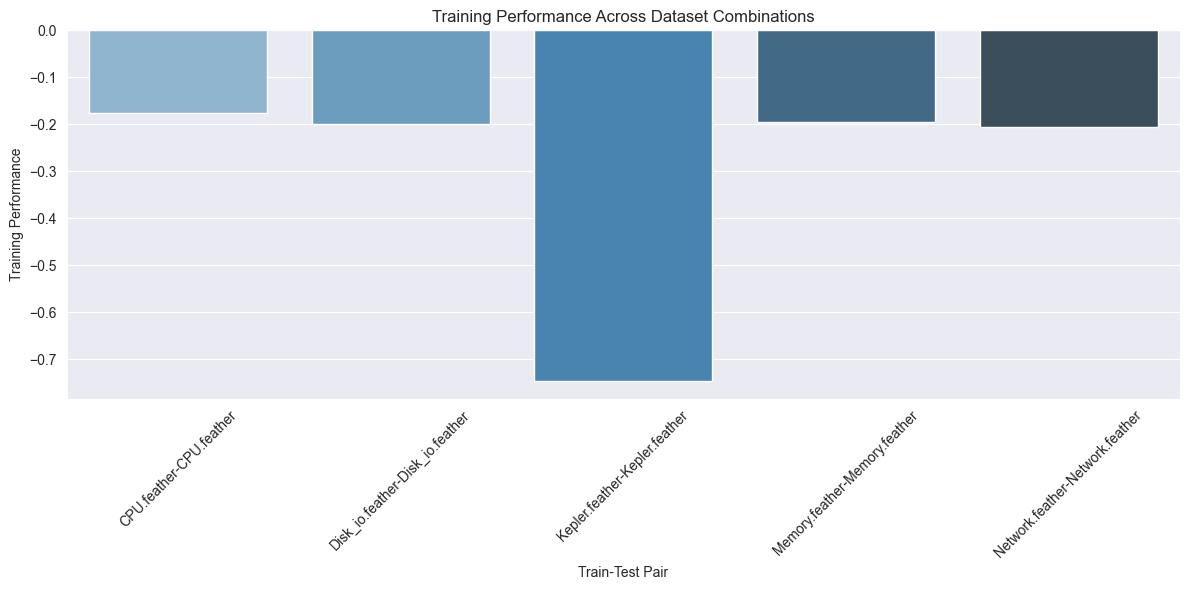

C:\Users\Anton\AppData\Local\Temp\ipykernel_19820\326902382.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_df, x="Train-Test Pair", y="Testing R²", palette="Greens_d")


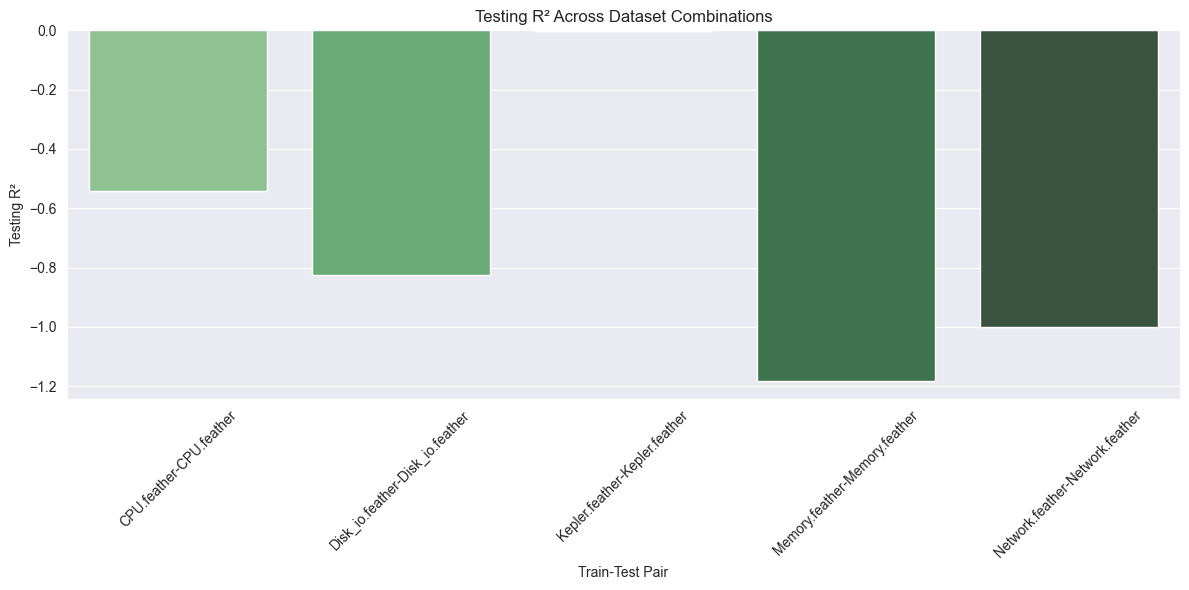

C:\Users\Anton\AppData\Local\Temp\ipykernel_19820\326902382.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_df, x="Train-Test Pair", y="Testing MSE", palette="Reds_d")


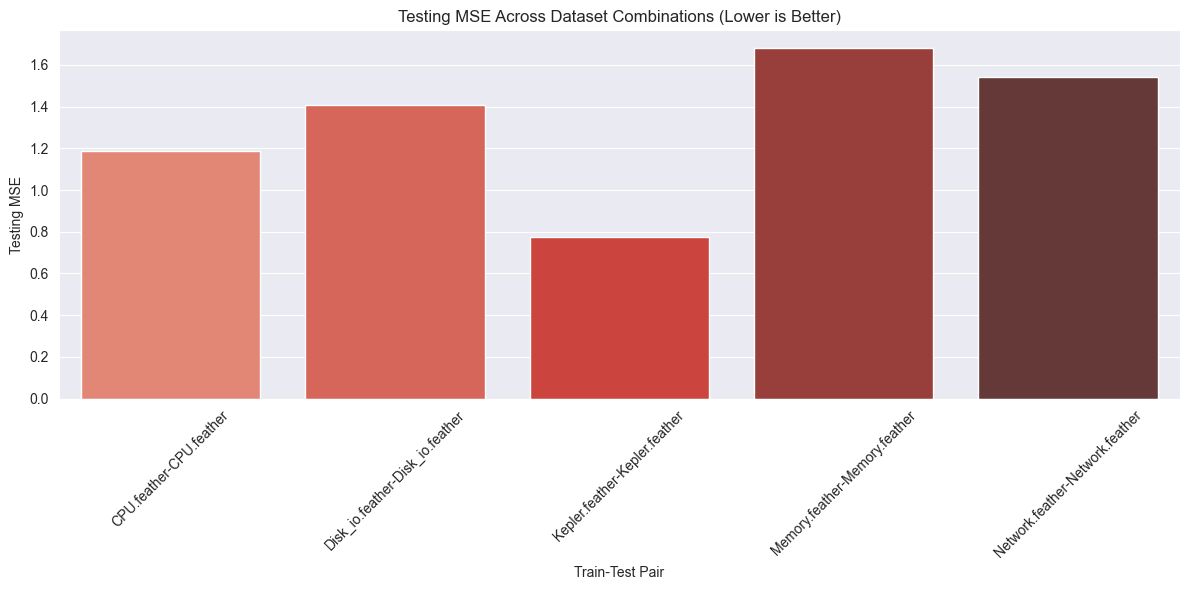

No valid feature importance data found in results.


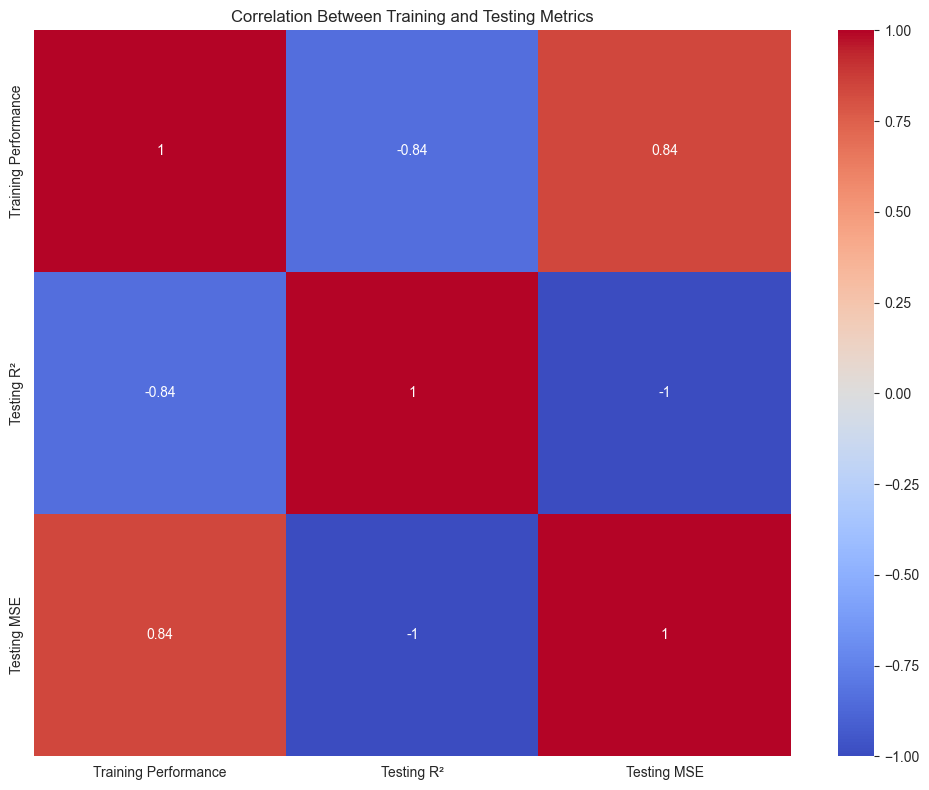

Preset alias specified: 'medium' maps to 'medium_quality'.
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.16
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          32
Memory Avail:       34.71 GB / 63.77 GB (54.4%)
Disk Space Avail:   147.05 GB / 1906.83 GB (7.7%)
Presets specified: ['medium']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "C:\Users\Anton\Documents\projektit\06_framework\framework-predict\experiments\qos\saved_models\10min_7b_7c\Other.feather"
Train Data Rows:    82843
Train Data Columns: 15
Label Column:       target
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    35548.59 MB
	Train Data (Original)  Memory Usage: 9.48 MB (0.0% of available memory)
	Inferring data ty

Train dataset has 16 columns
Test dataset has 16 columns
Using 16 common columns for training and testing
Training on Other.feather, will test on Other.feather
Training model on Other.feather...
Training new model for Other.feather...


	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
		Fitting DatetimeFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerator...
	Types of features in original data (raw dtype, special dtypes):
		('datetime', []) :  1 | ['timestamp']
		('float', [])    : 10 | ['{"__name__": "node_pressure_io_stalled_seconds_rate", "instance": "worker"}', '{"__name__": "node_timex_offset_seconds", "instance": "worker"}', '{"__name__": "promhttp_metric_handler_requests_rate", "instance": "worker"}', '{"__name__": "node_pressure_io_waiting_seconds_rate", "instance": "worker"}', '{"__name__": "node_forks_rate", "instance": "worker"}', ...]
		('int', [])      :  4 | ['{"__name__": "node_thermal_zone_temp", "instance": "worker", "type": "acpitz", "zone": "0"}', '{"__name__": "node_procs_running", "instance": "worker"}', '{"__name__": "node_filefd_allocated", "

[1000]	valid_set's rmse: 0.326343
[2000]	valid_set's rmse: 0.293991
[3000]	valid_set's rmse: 0.281529
[4000]	valid_set's rmse: 0.274895
[5000]	valid_set's rmse: 0.269585
[6000]	valid_set's rmse: 0.264965
[7000]	valid_set's rmse: 0.261575
[8000]	valid_set's rmse: 0.259072
[9000]	valid_set's rmse: 0.256301
[10000]	valid_set's rmse: 0.253896


	-0.2539	 = Validation score   (-root_mean_squared_error)
	10.29s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: LightGBM ... Training model for up to 588.47s of the 588.47s of remaining time.


[1000]	valid_set's rmse: 0.238973
[2000]	valid_set's rmse: 0.210761
[3000]	valid_set's rmse: 0.198027
[4000]	valid_set's rmse: 0.189761
[5000]	valid_set's rmse: 0.183498
[6000]	valid_set's rmse: 0.179462
[7000]	valid_set's rmse: 0.175662
[8000]	valid_set's rmse: 0.172807
[9000]	valid_set's rmse: 0.170734
[10000]	valid_set's rmse: 0.168859


	-0.1689	 = Validation score   (-root_mean_squared_error)
	8.58s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: RandomForestMSE ... Training model for up to 579.03s of the 579.03s of remaining time.
	-0.151	 = Validation score   (-root_mean_squared_error)
	6.47s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: CatBoost ... Training model for up to 572.20s of the 572.20s of remaining time.
	-0.2019	 = Validation score   (-root_mean_squared_error)
	73.49s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: ExtraTreesMSE ... Training model for up to 498.68s of the 498.68s of remaining time.
	-0.1596	 = Validation score   (-root_mean_squared_error)
	1.83s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: NeuralNetFastAI ... Training model for up to 496.48s of the 496.48s of remaining time.
	-0.3324	 = Validation score   (-root_mean_squared_error)
	46.48s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: XGBoo

Skipping feature importance calculation...
Testing model on Other.feather...
*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2  -0.148977  root_mean_squared_error       0.139520   30.265517                0.000000           0.010324            2       True         11
1       RandomForestMSE  -0.151018  root_mean_squared_error       0.048042    6.473672                0.048042           6.473672            1       True          5
2               XGBoost  -0.155266  root_mean_squared_error       0.091478   23.781521                0.091478          23.781521            1       True          9
3         ExtraTreesMSE  -0.159558  root_mean_squared_error       0.062881    1.825914                0.062881           1.825914            1       True          7
4              LightGBM  -0.168859  

C:\Users\Anton\AppData\Local\Temp\ipykernel_19820\326902382.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_df, x="Train-Test Pair", y="Training Performance", palette="Blues_d")


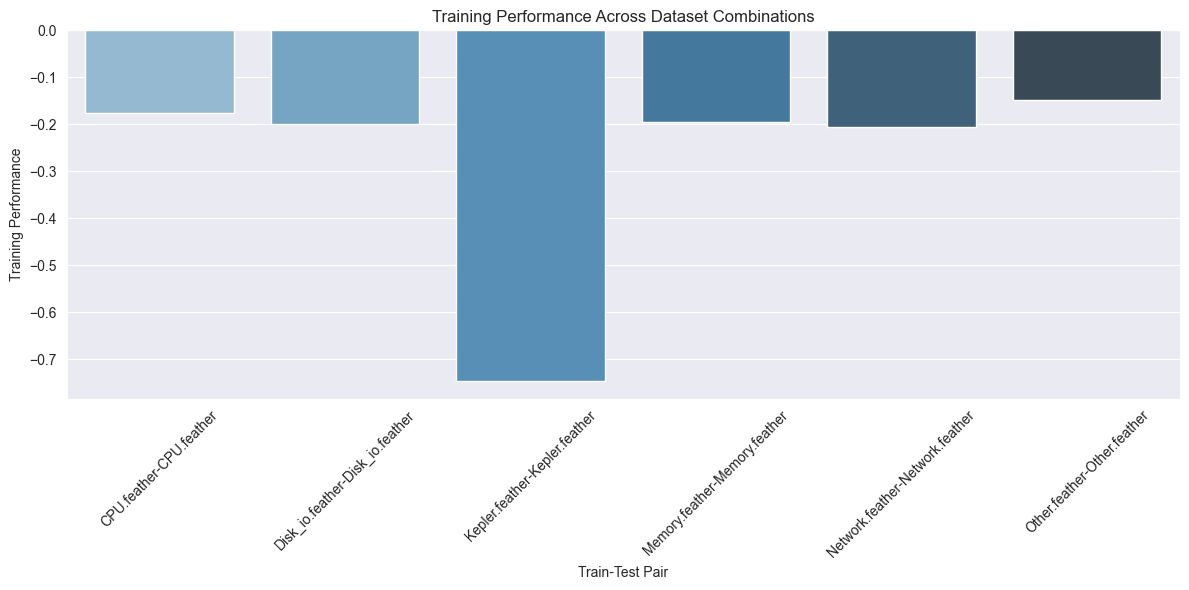

C:\Users\Anton\AppData\Local\Temp\ipykernel_19820\326902382.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_df, x="Train-Test Pair", y="Testing R²", palette="Greens_d")


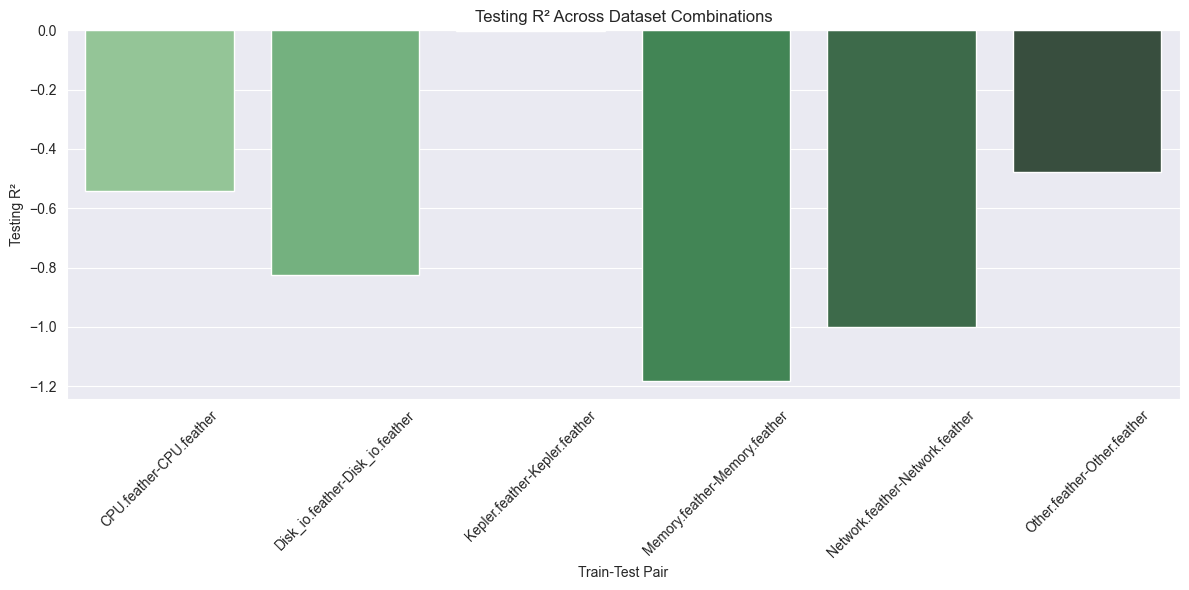

C:\Users\Anton\AppData\Local\Temp\ipykernel_19820\326902382.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_df, x="Train-Test Pair", y="Testing MSE", palette="Reds_d")


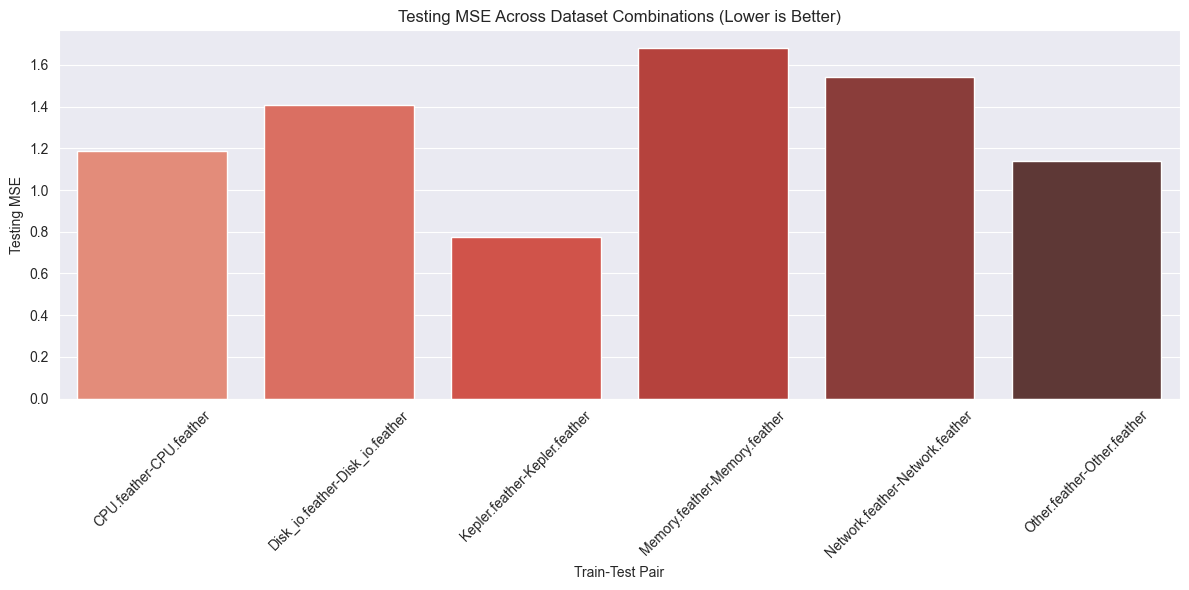

No valid feature importance data found in results.


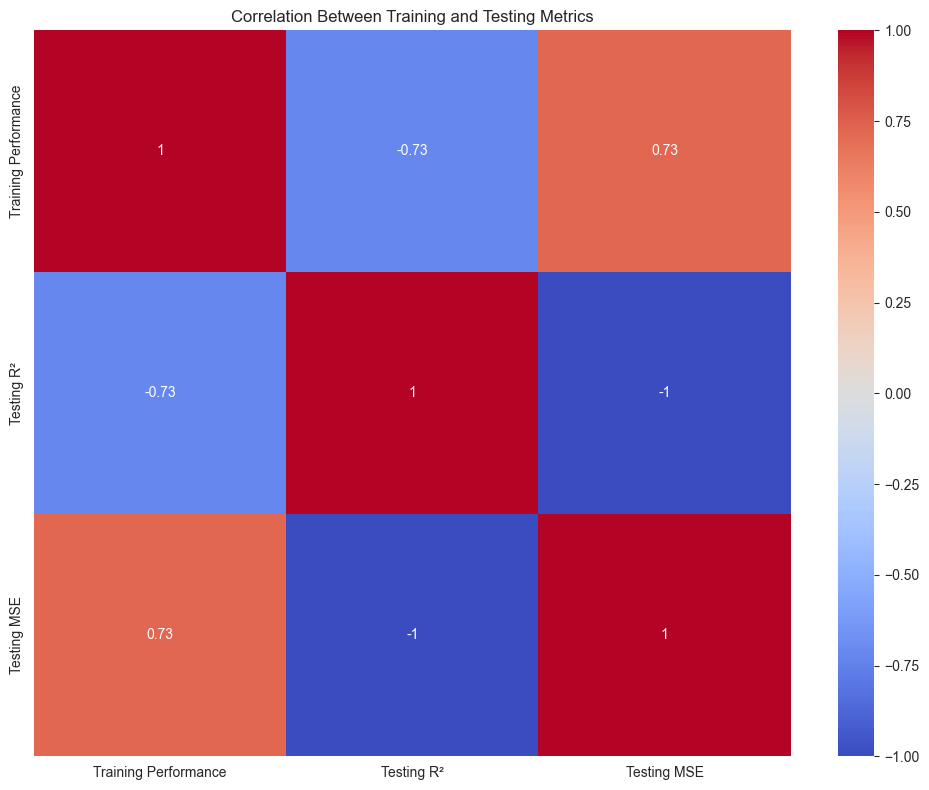

In [3]:
def train_and_test_across_datasets(train_file_paths, test_file_path, time_limit, model_name, calculate_feature_importance=True):
    # Load the training datasets
    train_df_list = []
    current_model_path = os.path.join(model_save_path, model_name)

    for train_file_path in train_file_paths:
        train_df = pd.read_feather(train_file_path)
        train_df = train_df.dropna()  # Drop NaN values

        to_remove = None
        for col in train_df.columns:
            pass
            # print(col)
            # if not ("node_cpu_scaling_frequency_hertz" in col or "target" in col):
            # if "node_load15" in col or "node_load5" in col:
            #     to_remove = col
            #     train_df.drop(columns=[to_remove], inplace=True)
        train_df_list.append(train_df)
    train_df = pd.concat(train_df_list, axis=0)


    # Load the testing dataset
    test_df = pd.read_feather(test_file_path)
    test_df = test_df.dropna()  # Drop NaN values

    # Scale to account for 5 second sampling rate (TODO: Should do this when creating the dataset)
    train_df["target"] = train_df["target"] / 5
    test_df["target"] = test_df["target"] / 5


    # Check common columns
    common_cols = list(set(train_df.columns).intersection(set(test_df.columns)))
    print(f"Train dataset has {len(train_df.columns)} columns")
    print(f"Test dataset has {len(test_df.columns)} columns")
    print(f"Using {len(common_cols)} common columns for training and testing")
    # Filter both datasets to only include common columns
    train_df = train_df[common_cols]
    test_df = test_df[common_cols]

    train_name = os.path.basename(train_file_path)
    test_name = os.path.basename(test_file_path)

    print(f"Training on {train_name}, will test on {test_name}")

    if len(train_df.columns) > 1 and "target" in train_df.columns:
        label_column = "target"

        # Train predictor on training dataset
        print(f"Training model on {train_name}...")
        # Check for existing model
        if os.path.exists(current_model_path):
            print(f"Found existing model for {model_name}, loading...")
            predictor = TabularPredictor.load(current_model_path)
        else:
            print(f"Training new model for {model_name}...")
            predictor = TabularPredictor(label=label_column, problem_type="regression", path=current_model_path)
            predictor.fit(train_df, time_limit=time_limit,
                          verbosity=2, presets=autogluon_preset)

        # Get training performance
        train_performance = predictor.leaderboard(silent=True)['score_val'][0]

        # Calculate feature importance only if flag is enabled
        if calculate_feature_importance:
            print("Calculating feature importance...")
            feature_importances = predictor.feature_importance(train_df).head(5)
            top_features = feature_importances.index.tolist()
            feature_importance_values = feature_importances['importance'].values.tolist()
        else:
            print("Skipping feature importance calculation...")
            top_features = []
            feature_importance_values = []

        # Test on the test dataset
        if len(test_df.columns) > 1 and "target" in test_df.columns:
            print(f"Testing model on {test_name}...")

            # Make predictions on test data
            y_pred = predictor.predict(test_df.drop(columns=[label_column]))

            # Evaluate performance on test data (assuming regression task)
            from sklearn.metrics import mean_squared_error, r2_score
            y_true = test_df[label_column]

            test_mse = mean_squared_error(y_true, y_pred)
            test_r2 = r2_score(y_true, y_pred)

            result = {
                "train_dataset": train_name,
                "test_dataset": test_name,
                "train_performance": train_performance,
                "test_mse": test_mse,
                "test_r2": test_r2,
                "model_summary": predictor.fit_summary()
            }

            # Add feature importance info only if calculated
            if calculate_feature_importance:
                result["top_features"] = top_features
                result["feature_importance"] = feature_importance_values

            return result
        else:
            result = {
                "train_dataset": train_name,
                "test_dataset": test_name,
                "train_performance": train_performance,
                "error": "Test dataset does not have required columns or target variable"
            }

            # Add feature importance info only if calculated
            if calculate_feature_importance:
                result["top_features"] = top_features
                result["feature_importance"] = feature_importance_values

            return result
    else:
        print("Training dataset does not have required columns or target variable")
        return {
            "train_dataset": train_name,
            "test_dataset": test_name,
            "error": "Training dataset does not have required columns or target variable"
        }


# Initialize the results dictionary
results = {}

# Process all datasets - add the parameter to disable feature importance for faster prototyping
for dataset_type in dataset_types:
    dataset_paths = [os.path.join(p, dataset_type) for p in dataset_dirs]
    test_path = os.path.join(test_dataset_dir, dataset_type)
    results[dataset_type] = train_and_test_across_datasets(
        dataset_paths,
        test_path,
        time_limit_seconds,
        model_name=dataset_type,
        calculate_feature_importance=calculate_features
    )
    plot_results(results)


In [4]:
# Create visualization of results
# 1. Performance comparison
summary_df = pd.DataFrame([
    {"Dataset": res["dataset"], "Performance": res["performance"]}
    for res in results.values()
    if "performance" in res
])

plt.figure(figsize=(10, 6))
sns.barplot(data=summary_df, x="Dataset", y="Performance", palette="viridis")
plt.title("Model Performance Across Datasets")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Feature importance plots
valid_results = [r for r in results.values() if "top_features" in r]
num_datasets = len(valid_results)
fig, axes = plt.subplots(num_datasets, 1, figsize=(10, 5 * num_datasets))

for i, res in enumerate(valid_results):
    axes[i].bar(res["top_features"], res["feature_importance"])
    axes[i].bar(res["top_features"], res["feature_importance"])
    axes[i].set_title(f"Top Features: {res['dataset']}")
    axes[i].set_xlabel("Feature")
    axes[i].set_ylabel("Importance")
    axes[i].tick_params(axis='x', rotation=45)
    print(res["top_features"])

plt.tight_layout()
plt.show()

ValueError: Could not interpret value `Dataset` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>